**Genetic Algorithm Implementation for 2-Clusters**

In [56]:
#Import Libraries
import numpy
import matplotlib.pyplot as plt
from generate_data_class import GenerateData
import kmeans

In [57]:
#Set Constant Variables
num_clusters = 3
gy = GenerateData(num_clusters)

In [58]:
'''
Input: 
1. solution is the initial coordinates of centriods. For example,
if num_of_clusters = 2, then
solution = [C1-x, C1-y, C2-x, C2-y]
2. data is the whole data, all the samples

'''
data = gy.raw_data()
def cluster_data(solution):
    global num_clusters, data
    feature_vector_length = data.shape[1]
    cluster_centers = []
    all_clusters_dists = []
    clusters = []
    clusters_sum_dist = []

    for clust_idx in range(num_clusters):
        cluster_centers.append(solution[feature_vector_length*clust_idx:feature_vector_length*(clust_idx+1)])
        cluster_center_dists = kmeans.euclidean(data, cluster_centers[clust_idx])
        all_clusters_dists.append(numpy.array(cluster_center_dists))

    cluster_centers = numpy.array(cluster_centers)
    all_clusters_dists = numpy.array(all_clusters_dists)

    cluster_indices = numpy.argmin(all_clusters_dists, axis=0)
    for clust_idx in range(num_clusters):
        clusters.append(numpy.where(cluster_indices == clust_idx)[0])
        if len(clusters[clust_idx]) == 0:
            clusters_sum_dist.append(0)
        else:
            clusters_sum_dist.append(numpy.sum(all_clusters_dists[clust_idx, clusters[clust_idx]]))

    clusters_sum_dist = numpy.array(clusters_sum_dist)

    return cluster_centers, all_clusters_dists, clusters, clusters_sum_dist

In [59]:
#fitness function
'''
fitness_func() is created and calls the cluster_data() function and 
calculates the sum of distances in all clusters
'''
def fitness_func(solution):
    fit_list = []
    m,_ = solution.shape
    for t in range(m):
        _, _, _, clusters_sum_dist = cluster_data(solution[t])
        fitness = 1.0 / (numpy.sum(clusters_sum_dist) + 0.00000001)
        fit_list.append(fitness)

    return numpy.array(fit_list)

In [60]:
#GENERATE Initial coordinates for cluster center

def init_cluster_center():
    io = []
    rc = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
    cluster1_x1 = numpy.array([40,46,11,11,2,2])
    io.append(cluster1_x1)
    for y in range(len(rc)):
        ui = rc[y]*cluster1_x1
        io.append(ui)
    return numpy.array(io)

In [61]:
#Print Result
def get_results(generation,population,fitness):
    m = population.shape[0]
    best = [fitness.max()]
    index = numpy.where(numpy.isclose(fitness, best))
    population = numpy.array(population)
    print(f'Generation #{generation}   |fitness: {max(fitness):0.5f} |Centroid = {population[index[0]][0]}')

In [62]:
#Plot Fitness Values over generations
def display_plot(best):
    plt.plot(best, color='c')
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness')
    plt.grid()
    plt.show()

In [63]:
#Selection
def selection(pop,sample_size, fitness):
    m,n = pop.shape
    new_pop = pop.copy()
        
    for i in range(m):
        rand_id = numpy.random.choice(m, size=max(1, int(sample_size*m)), replace=False)
        max_id = rand_id[fitness[rand_id].argmax()]
        new_pop[i] = pop[max_id].copy()
    
    return new_pop

#Crossover
def crossover(pop, pc):
    m,n = pop.shape
    new_pop = pop.copy()
    
    for i in range(0, m-1, 2):
        if numpy.random.uniform(0, 1) < pc:
            pos = numpy.random.randint(0, n-1)
            new_pop[i, pos+1:] = pop[i+1, pos+1:].copy()
            new_pop[i+1, pos+1:] = pop[i, pos+1:].copy()
            
    return new_pop

#Mutation
def mutation(pop, pm):
    m,n = pop.shape
    new_pop = pop.copy()
    mutation_prob = (numpy.random.uniform(0, 1, size=(m,n)) < pm).astype(int)
    return (mutation_prob + new_pop)

#GENETIC ALGORITHM

def GeneticAlgorithm(func,ps=0.2, pc=1.0, pm=0.1, max_iter=100, random_state=123):
    
    numpy.random.seed(random_state)
    pop = init_cluster_center()
    fitness = func(pop)
    best = [fitness.max()]    
    print('=' * 68)
    get_results(-1,pop,fitness)
    i = 0
    while i < max_iter:
        pop = selection(pop, ps, fitness)
        pop = crossover(pop, pc)
        pop = mutation(pop, pm)
        fitness = func(pop)
        best.append(fitness.max())
        get_results(i,pop,fitness)
        i += 1
        
    return fitness, best, i, pop
    

In [64]:
_, plot_result, _, _ = GeneticAlgorithm(fitness_func)

Generation #-1   |fitness: 0.00061 |Centroid = [44.  50.6 12.1 12.1  2.2  2.2]
Generation #0   |fitness: 0.00061 |Centroid = [44.  50.6 12.1 12.1  2.2  2.2]
Generation #1   |fitness: 0.00062 |Centroid = [44.  50.6 12.1 12.1  2.2  2.6]
Generation #2   |fitness: 0.00062 |Centroid = [44.  51.6 12.1 12.1  2.2  3.6]
Generation #3   |fitness: 0.00062 |Centroid = [44.  50.6 12.1 14.3  3.6  2.6]
Generation #4   |fitness: 0.00062 |Centroid = [45.  46.  14.3 13.1  2.2  3.6]
Generation #5   |fitness: 0.00062 |Centroid = [45.  51.6 13.1 14.1  3.2  2.6]
Generation #6   |fitness: 0.00062 |Centroid = [45.  51.6 13.1 12.1  2.2  3.6]
Generation #7   |fitness: 0.00062 |Centroid = [45.  51.6 13.1 12.1  2.2  3.6]
Generation #8   |fitness: 0.00062 |Centroid = [47.  51.6 12.1 12.1  4.6  3.6]
Generation #9   |fitness: 0.00062 |Centroid = [46.  51.6 13.1 13.1  4.6  3.6]
Generation #10   |fitness: 0.00062 |Centroid = [47.  51.6 12.1 13.1  4.6  3.6]
Generation #11   |fitness: 0.00062 |Centroid = [47.  51.6 12.1

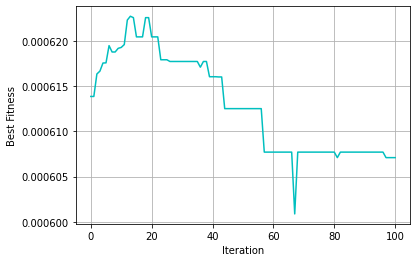

In [65]:
display_plot(plot_result)